In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


In [162]:


# Define the dataset path
dataset_path = "/Users/olaoluwatunmise/Diamond-Price-Predictor/SDS-CP023-diamond-price-predictor/submissions-team/Oluwatunmise-Olaoluwa/type-of-the-Diamond.csv"
#"/Users/olaoluwatunmise/.cache/kagglehub/datasets/willianoliveiragibin/type-of-the-diamond/versions/1/your_file.csv"

# Load into a Pandas DataFrame
df = pd.read_csv(dataset_path)

# Set Pandas display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping
pd.set_option('display.width', 200)  # Set a wide width

# Display first few rows
print(df.tail())


             cut color clarity  carat  depth  table  price  x (Premium)  z (Very Good)  y (Good)
53935  Very Good     E     VS2    0.7   62.8   60.0   2755         5.59           3.53      5.65
53936  Very Good     D     VS1    0.7   63.1   59.0   2755         5.67           3.55      5.58
53937  Very Good     E     VS2    0.7   60.5   59.0   2757         5.71           3.47      5.76
53938  Very Good     E     VS2    0.7   61.2   59.0   2757         5.69           3.49      5.72
53939  Very Good     D     SI1    0.7   62.8   60.0   2757         5.66           3.56      5.68


# Exploratory Data Analysis

In [124]:
# Correct column names (assuming x,y,z are dimensions)

df.rename(columns={
    'x (Premium)': 'x',
    'y (Good)': 'y',
    'z (Very Good)': 'z'
}, inplace=True)


In [125]:
print("Statistical Summary:")
print(df.describe())

Statistical Summary:
              carat         depth         table         price             x             z             y
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000
mean       0.797940     61.749405     57.457184   3932.799722      5.731157      3.538734      5.734526
std        0.474011      1.432621      2.234491   3989.439738      1.121761      0.705699      1.142135
min        0.200000     43.000000     43.000000    326.000000      0.000000      0.000000      0.000000
25%        0.400000     61.000000     56.000000    950.000000      4.710000      2.910000      4.720000
50%        0.700000     61.800000     57.000000   2401.000000      5.700000      3.530000      5.710000
75%        1.040000     62.500000     59.000000   5324.250000      6.540000      4.040000      6.540000
max        5.010000     79.000000     95.000000  18823.000000     10.740000     31.800000     58.900000


In [126]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cut      53940 non-null  object 
 1   color    53940 non-null  object 
 2   clarity  53940 non-null  object 
 3   carat    53940 non-null  float64
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   z        53940 non-null  float64
 9   y        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
None


# Identify Missing or Zero Values

#### Since physical dimensions cannot be zero, 
#### we'll check how many rows have x, y, or z equal to 0.

In [127]:
# Check for missing numbers
print(df.isnull().sum())

cut        0
color      0
clarity    0
carat      0
depth      0
table      0
price      0
x          0
z          0
y          0
dtype: int64


In [128]:
# missing_values = df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)] 

# print(f"Rows with zero values in x, y, or z: {missing_values.shape[0]}")

# print(missing_values)

### Handle the Zero Values

### The number of rows with zeros are 20 which is insignificant in a total row of 53940

In [129]:
# df = df[(df['x'] != 0) & (df['y'] != 0) & (df['z'] != 0)]


In [130]:
print(df.describe())

              carat         depth         table         price             x             z             y
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000
mean       0.797940     61.749405     57.457184   3932.799722      5.731157      3.538734      5.734526
std        0.474011      1.432621      2.234491   3989.439738      1.121761      0.705699      1.142135
min        0.200000     43.000000     43.000000    326.000000      0.000000      0.000000      0.000000
25%        0.400000     61.000000     56.000000    950.000000      4.710000      2.910000      4.720000
50%        0.700000     61.800000     57.000000   2401.000000      5.700000      3.530000      5.710000
75%        1.040000     62.500000     59.000000   5324.250000      6.540000      4.040000      6.540000
max        5.010000     79.000000     95.000000  18823.000000     10.740000     31.800000     58.900000


In [131]:
print(df.isna().sum())

cut        0
color      0
clarity    0
carat      0
depth      0
table      0
price      0
x          0
z          0
y          0
dtype: int64


In [132]:
# # Identify outliers using IQR method

# def detect_outliers(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
#     return outliers

# # Identify outliers for key numerical features
# outlier_columns = ['carat', 'price', 'x', 'y', 'z']
# outliers = {col: detect_outliers(df, col) for col in outlier_columns}

# # Print number of outliers detected
# for col, data in outliers.items():
#     print(f"Outliers in {col}: {data.shape[0]}")


In [133]:
# # Function to remove outliers using IQR
# def remove_outliers(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# # Remove outliers for carat, x, y, z
# for col in ['carat', 'x', 'y', 'z']:
#     df = remove_outliers(df, col)
  


# # Ensure price is within a reasonable range (e.g., 326 to 100,000)
# df = df[(df['price'] >= 326) & (df['price'] <= 100000)]

# # Recompute price_log
# df['price_log'] = np.log1p(df['price'])

# # Recompute volume
# df['volume'] = df['x'] * df['y'] * df['z']

# # Check the new summary statistics
# print(df[['carat', 'price', 'x', 'y', 'z', 'volume']].describe())

# Understanding the Outliers

## We need to understand that the outliers are not errors but rather natural variations

### Carat: Outliers (1,883 rows ≈ 3.5%) could represent unusually large diamonds, which are rare but real.

### Price: Outliers (3,532 rows ≈ 6.5%) could correspond to premium diamonds with exceptional carat, clarity, color, or cut.


#### We Check if these outliers align with domain expectations (e.g., high carat → high price) using scatter plots or correlations.




# Correlation Matrix

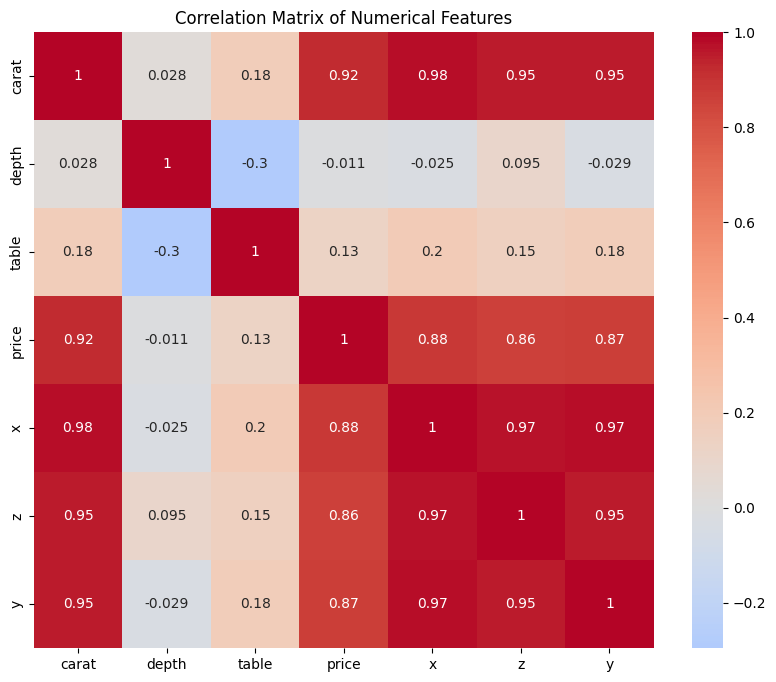

In [134]:
# Correlation matrix
numeric_cols = ['carat', 'depth', 'table', 'price', 'x', 'z', 'y']
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# The Scatter Plot

### The scatter plots "Carat vs Price" and "Carat vs x Dimension"—offer a visual confirmation of the relationships between these features in your diamond dataset. 

#### The Scatter Plot shows that the Outliers are domain-consistent, i would keep them as-is and use a robust model (Random Forest or Gradient Boosting) that can handle non-linear relationships and outliers naturally.



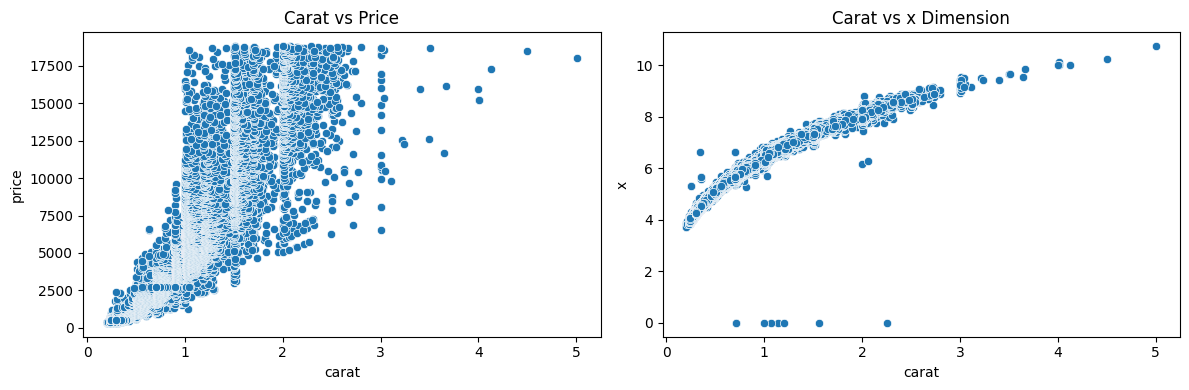

In [135]:

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='carat', y='price')
plt.title('Carat vs Price')
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='carat', y='x')
plt.title('Carat vs x Dimension')
plt.tight_layout()
plt.show()


In [136]:
print(df)
print(df.describe())

             cut color clarity  carat  depth  table  price     x     z     y
0           Fair     E     VS2   0.22   65.1   61.0    337  3.87  2.49  3.78
1           Fair     E     SI2   0.86   55.1   69.0   2757  6.45  3.52  6.33
2           Fair     F     SI2   0.96   66.3   62.0   2759  6.27  4.07  5.95
3           Fair     F     VS2   0.70   64.5   57.0   2762  5.57  3.58  5.53
4           Fair     F     VS2   0.70   65.3   55.0   2762  5.63  3.66  5.58
...          ...   ...     ...    ...    ...    ...    ...   ...   ...   ...
53935  Very Good     E     VS2   0.70   62.8   60.0   2755  5.59  3.53  5.65
53936  Very Good     D     VS1   0.70   63.1   59.0   2755  5.67  3.55  5.58
53937  Very Good     E     VS2   0.70   60.5   59.0   2757  5.71  3.47  5.76
53938  Very Good     E     VS2   0.70   61.2   59.0   2757  5.69  3.49  5.72
53939  Very Good     D     SI1   0.70   62.8   60.0   2757  5.66  3.56  5.68

[53940 rows x 10 columns]
              carat         depth         table  

# Categorical Encoding 

In [137]:
df['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [138]:
df['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [139]:

df['clarity'].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [140]:
unique_values = df['color'].unique().tolist()
unique_values


['E', 'F', 'H', 'G', 'J', 'I', 'D']

### Ordinal Encoding (For Ordered Categories)



#### Each unique row were ranked from Best to Worst to better help our result when we encode them.

In [ ]:
df = df.copy() # Create a deep copy to prevent the warning

#cut_order = ['ideal', 'Premium', 'Very Good', 'Good', 'Fair']
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'ideal']
#cut_order = df['cut'].unique().tolist()
#color_order = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
#color_order = df['color'].unique().tolist()
#clarity_order = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
#Clarity is from worst to best

df['cut_encoded'] = pd.Categorical(df['cut'],categories=cut_order, ordered = True).codes
df['color_encoded'] = pd.Categorical(df['color'], categories=color_order, ordered = True).codes
df['clarity_encoded'] = pd.Categorical(df['clarity'], categories=clarity_order, ordered=True).codes

df.head()


,cut,color,clarity,carat,depth,table,price,x,z,y,cut_encoded,color_encoded,clarity_encoded
0,Fair,E,VS2,0.22,65.1,61.0,337,3.87,2.49,3.78,0,5,3
1,Fair,E,SI2,0.86,55.1,69.0,2757,6.45,3.52,6.33,0,5,1
2,Fair,F,SI2,0.96,66.3,62.0,2759,6.27,4.07,5.95,0,4,1
3,Fair,F,VS2,0.70,64.5,57.0,2762,5.57,3.58,5.53,0,4,3
4,Fair,F,VS2,0.70,65.3,55.0,2762,5.63,3.66,5.58,0,4,3


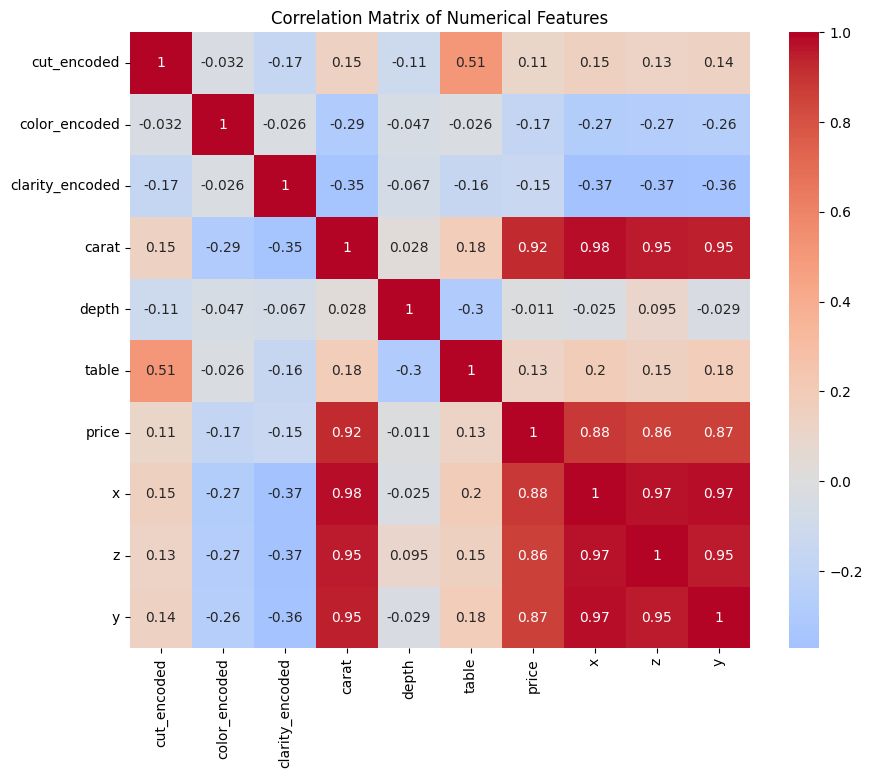

In [142]:
# Correlation matrix
numeric_cols = ['cut_encoded','color_encoded','clarity_encoded','carat', 'depth', 'table', 'price', 'x', 'z', 'y']
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

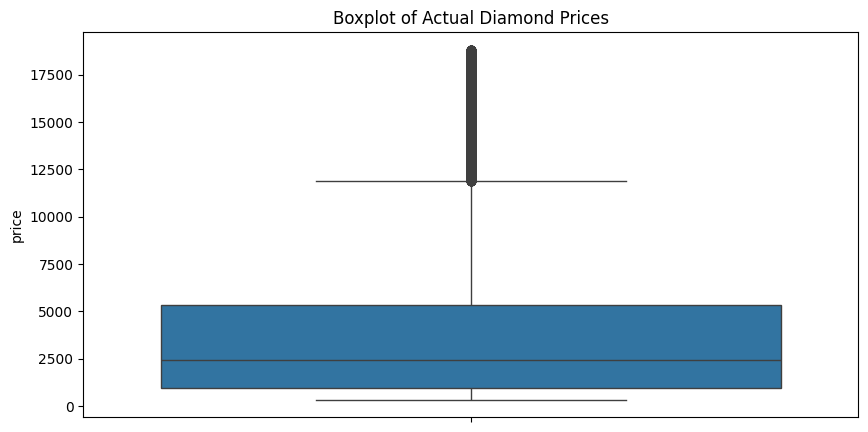

In [143]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.boxplot(y= df['price'])
plt.title("Boxplot of Actual Diamond Prices")
plt.show()

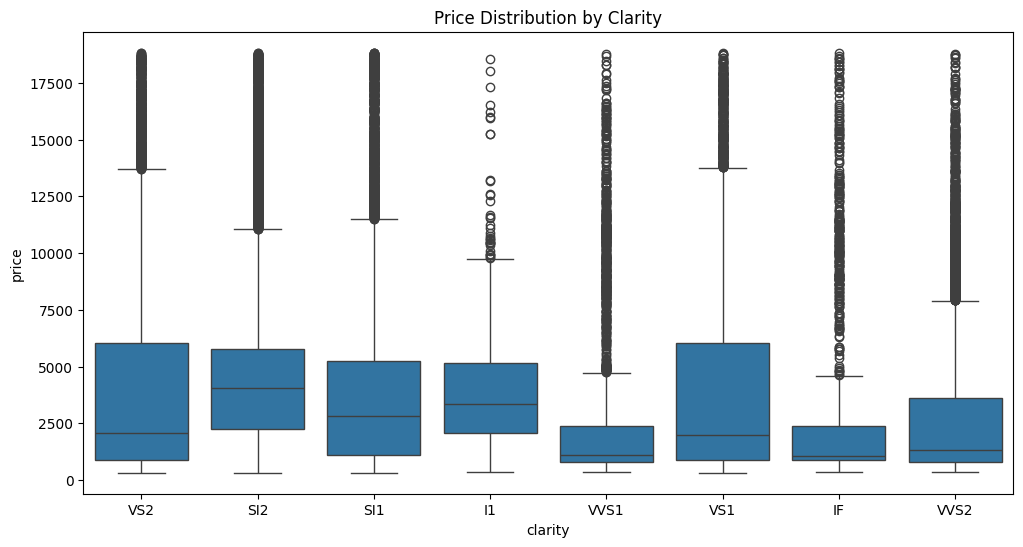

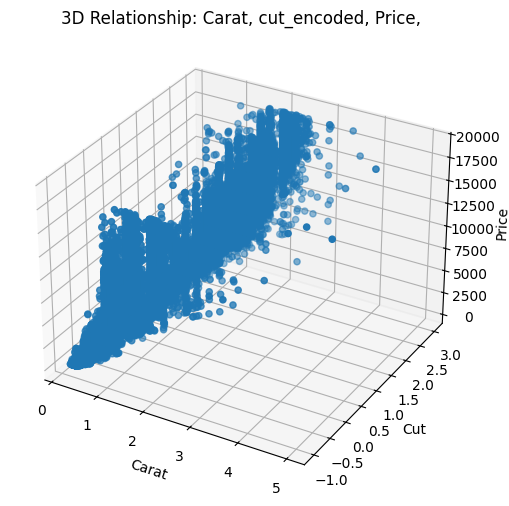

In [144]:
# Price vs Clarity
plt.figure(figsize=(12,6))
sns.boxplot(x='clarity', y='price', data=df)
plt.title('Price Distribution by Clarity')
plt.show()

# 3D Scatter Plot (carat, depth, price)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['carat'], df['cut_encoded'], df['price'])
ax.set_xlabel('Carat')
ax.set_ylabel('Cut')
ax.set_zlabel('Price')
plt.title('3D Relationship: Carat, cut_encoded, Price,')
plt.show()

# Feature Engineering

### Interaction Terms

In [145]:
df['carat_color_interaction'] = df['carat'] * df['color_encoded']
df['carat_clarity_interaction'] = df['carat'] * df['clarity_encoded']

### Quality Composite

In [146]:
df['quality_composite'] = (df['cut_encoded']*0.2 + df['color_encoded']*0.4 + df['clarity_encoded']*0.4)

### Carat-Quality Interaction

In [147]:
df['carat_quality_interaction'] = df['carat'] * df['quality_composite']

### Dimension - Volume

In [148]:
df['volume'] = (df['x'] * df['y'] * df['z'])

### Log Transformation

In [149]:
df['price_log'] = np.log1p(df['price'])

### Low-Price Indicator

In [150]:
df['low_price'] = (df['price'] < 1000).astype(int)

### Mid-Price Indicator

In [151]:
df['mid_price'] = ((df['price'] >= 1000) & (df['price'] <= 5000)).astype(int)


### High-Priced Diamonds

In [152]:
df['high_price'] = (df['price'] > 5000).astype(int)

In [153]:
print(df.columns.to_list)

<bound method IndexOpsMixin.tolist of Index(['cut', 'color', 'clarity', 'carat', 'depth', 'table', 'price', 'x', 'z', 'y', 'cut_encoded', 'color_encoded', 'clarity_encoded', 'carat_color_interaction', 'carat_clarity_interaction',
       'quality_composite', 'carat_quality_interaction', 'volume', 'price_log', 'low_price', 'mid_price', 'high_price'],
      dtype='object')>


In [154]:
# dff = df[df['price'] <= 9000]

# # df_filtered = df[(df['price'] >= 800) & (df['price'] <= 10000)]
# # df_filtered = df_filtered.reset_index(drop=True)

df.head()

,cut,color,clarity,carat,depth,table,price,x,z,y,cut_encoded,color_encoded,clarity_encoded,carat_color_interaction,carat_clarity_interaction,quality_composite,carat_quality_interaction,volume,price_log,low_price,mid_price,high_price
0,Fair,E,VS2,0.22,65.1,61.0,337,3.87,2.49,3.78,0,5,3,1.10,0.66,3.2,0.704,36.425214,5.823046,1,0,0
1,Fair,E,SI2,0.86,55.1,69.0,2757,6.45,3.52,6.33,0,5,1,4.30,0.86,2.4,2.064,143.716320,7.922261,0,1,0
2,Fair,F,SI2,0.96,66.3,62.0,2759,6.27,4.07,5.95,0,4,1,3.84,0.96,2.0,1.920,151.837455,7.922986,0,1,0
3,Fair,F,VS2,0.70,64.5,57.0,2762,5.57,3.58,5.53,0,4,3,2.80,2.10,2.8,1.960,110.271518,7.924072,0,1,0
4,Fair,F,VS2,0.70,65.3,55.0,2762,5.63,3.66,5.58,0,4,3,2.80,2.10,2.8,1.960,114.980364,7.924072,0,1,0


In [155]:
df.describe()

,carat,depth,table,price,x,z,y,cut_encoded,color_encoded,clarity_encoded,carat_color_interaction,carat_clarity_interaction,quality_composite,carat_quality_interaction,volume,price_log,low_price,mid_price,high_price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,3.538734,5.734526,0.906415,3.405803,3.051020,2.482632,2.159051,2.764012,2.025036,129.849403,7.787424,0.268799,0.458417,0.272785
std,0.474011,1.432621,2.234491,3989.439738,1.121761,0.705699,1.142135,1.692918,1.701105,1.647136,1.802497,1.531523,0.948554,1.165124,78.245262,1.014111,0.443339,0.498272,0.445395
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,-0.602000,0.000000,5.789960,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,2.910000,4.720000,-1.000000,2.000000,2.000000,1.200000,1.080000,2.200000,1.140000,65.136830,6.857514,0.000000,0.000000,0.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,3.530000,5.710000,1.000000,3.000000,3.000000,2.050000,1.770000,2.800000,1.710000,114.808572,7.784057,0.000000,0.000000,0.000000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,4.040000,6.540000,3.000000,5.000000,4.000000,3.390000,2.790000,3.400000,2.660000,170.842451,8.580215,1.000000,1.000000,1.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,31.800000,58.900000,3.000000,6.000000,7.000000,20.400000,16.030000,5.800000,8.738000,3840.598060,9.842888,1.000000,1.000000,1.000000


### Feature Selection

In [156]:
model_col = ['price','low_price','mid_price','high_price','carat', 'carat_color_interaction', 'carat_clarity_interaction',
       'quality_composite','carat_quality_interaction', 'volume']


In [157]:
model_df = df[model_col]
print(model_df)

       price  low_price  mid_price  high_price  carat  carat_color_interaction  carat_clarity_interaction  quality_composite  carat_quality_interaction      volume
0        337          1          0           0   0.22                     1.10                       0.66                3.2                      0.704   36.425214
1       2757          0          1           0   0.86                     4.30                       0.86                2.4                      2.064  143.716320
2       2759          0          1           0   0.96                     3.84                       0.96                2.0                      1.920  151.837455
3       2762          0          1           0   0.70                     2.80                       2.10                2.8                      1.960  110.271518
4       2762          0          1           0   0.70                     2.80                       2.10                2.8                      1.960  114.980364
...      ...    

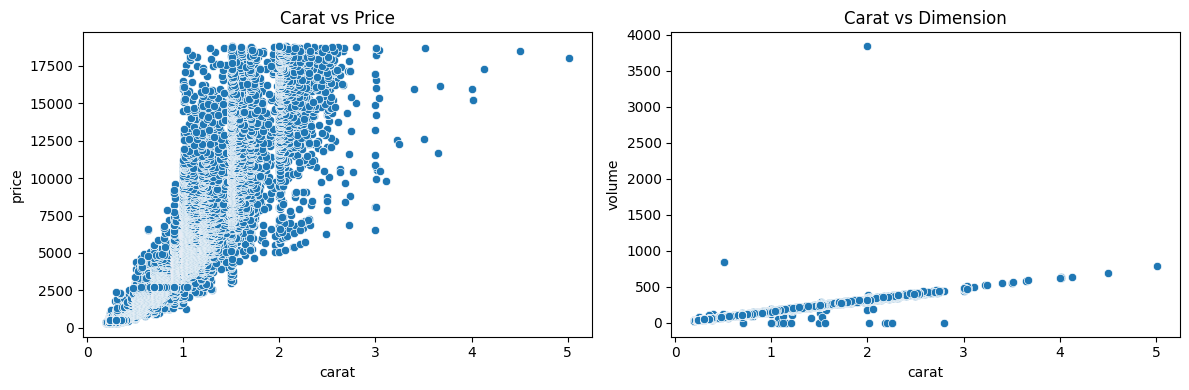

In [158]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(data=model_df, x='carat', y='price')
plt.title('Carat vs Price')
plt.subplot(1, 2, 2)
sns.scatterplot(data=model_df, x='carat', y='volume')
plt.title('Carat vs Dimension')
plt.tight_layout()
plt.show()

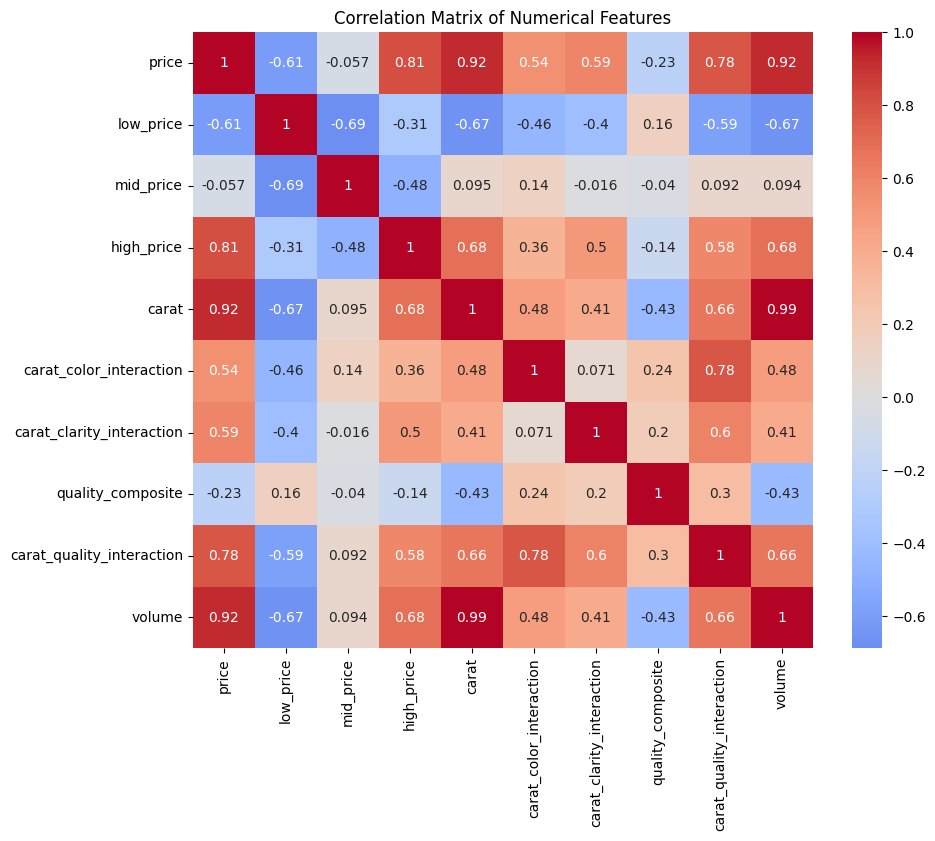

In [159]:
corr_matrix = dff[model_col].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [160]:
print(model_df)

with open("model_df.pkl", "wb") as f:
    pickle.dump(model_df, f)

       price  low_price  mid_price  high_price  carat  carat_color_interaction  carat_clarity_interaction  quality_composite  carat_quality_interaction      volume
0        337          1          0           0   0.22                     1.10                       0.66                3.2                      0.704   36.425214
1       2757          0          1           0   0.86                     4.30                       0.86                2.4                      2.064  143.716320
2       2759          0          1           0   0.96                     3.84                       0.96                2.0                      1.920  151.837455
3       2762          0          1           0   0.70                     2.80                       2.10                2.8                      1.960  110.271518
4       2762          0          1           0   0.70                     2.80                       2.10                2.8                      1.960  114.980364
...      ...    

In [161]:
model_df.describe()

,price,low_price,mid_price,high_price,carat,carat_color_interaction,carat_clarity_interaction,quality_composite,carat_quality_interaction,volume
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,3932.799722,0.268799,0.458417,0.272785,0.797940,2.482632,2.159051,2.764012,2.025036,129.849403
std,3989.439738,0.443339,0.498272,0.445395,0.474011,1.802497,1.531523,0.948554,1.165124,78.245262
min,326.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,-0.200000,-0.602000,0.000000
25%,950.000000,0.000000,0.000000,0.000000,0.400000,1.200000,1.080000,2.200000,1.140000,65.136830
50%,2401.000000,0.000000,0.000000,0.000000,0.700000,2.050000,1.770000,2.800000,1.710000,114.808572
75%,5324.250000,1.000000,1.000000,1.000000,1.040000,3.390000,2.790000,3.400000,2.660000,170.842451
max,18823.000000,1.000000,1.000000,1.000000,5.010000,20.400000,16.030000,5.800000,8.738000,3840.598060
